In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ------------------------------------------------------------
# IMAGE LOADING
# ------------------------------------------------------------
def load_and_prepare_image(image_path):
    """
    Load color image and convert to grayscale.
    """
    img_color = cv2.imread(image_path)
    if img_color is None:
        raise FileNotFoundError(f"Cannot load image: {image_path}")

    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return img_color, img_gray




In [3]:
# ------------------------------------------------------------
# FEATURE DETECTORS
# ------------------------------------------------------------
def detect_and_compute_sift(gray_img):
    """
    Detect keypoints and compute SIFT descriptors.
    Descriptor type: float (128-D)
    """
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    return keypoints, descriptors


def detect_and_compute_orb(gray_img, nfeatures=1500):
    """
    Detect keypoints and compute ORB descriptors.
    Descriptor type: binary
    """
    orb = cv2.ORB_create(nfeatures=nfeatures)
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    return keypoints, descriptors


def detect_and_compute_surf(gray_img):
    """
    SURF detector (may not be available in pip OpenCV).
    """
    try:
        surf = cv2.xfeatures2d.SURF_create()
        keypoints, descriptors = surf.detectAndCompute(gray_img, None)
        return keypoints, descriptors
    except:
        print("SURF not available in this OpenCV build.")
        return [], None




In [4]:
# ------------------------------------------------------------
# KEYPOINT VISUALIZATION
# ------------------------------------------------------------
def draw_keypoints(img_color, keypoints, title):
    img_kp = cv2.drawKeypoints(
        img_color,
        keypoints,
        None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(10, 7))
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()




In [5]:
# ------------------------------------------------------------
# FEATURE MATCHING (BF + RATIO TEST)
# ------------------------------------------------------------
def match_features(des1, des2, method="SIFT", ratio_thresh=0.75):
    """
    Match descriptors using BFMatcher + Lowe's ratio test.
    """
    if method == "SIFT":
        bf = cv2.BFMatcher(cv2.NORM_L2)
    else:  # ORB
        bf = cv2.BFMatcher(cv2.NORM_HAMMING)

    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)

    return good_matches


def draw_matches(img1, kp1, img2, kp2, matches, title):
    """
    Draw feature matches between two images.
    """
    matched_img = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        matches, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(14, 8))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()





=== SIFT FEATURE DETECTION ===
SIFT Image1: 43 keypoints
SIFT Image2: 33 keypoints


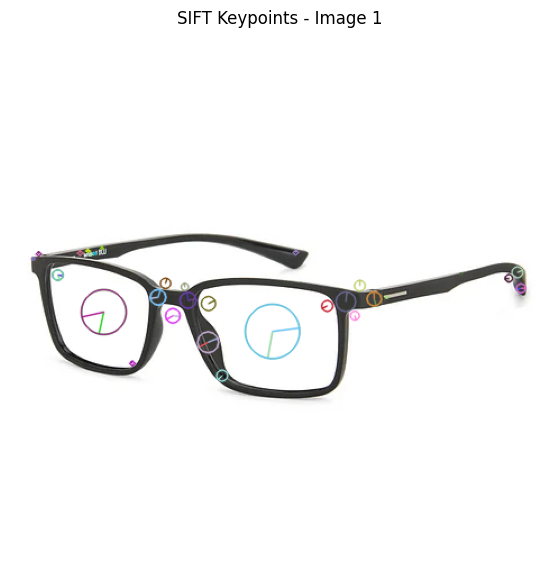

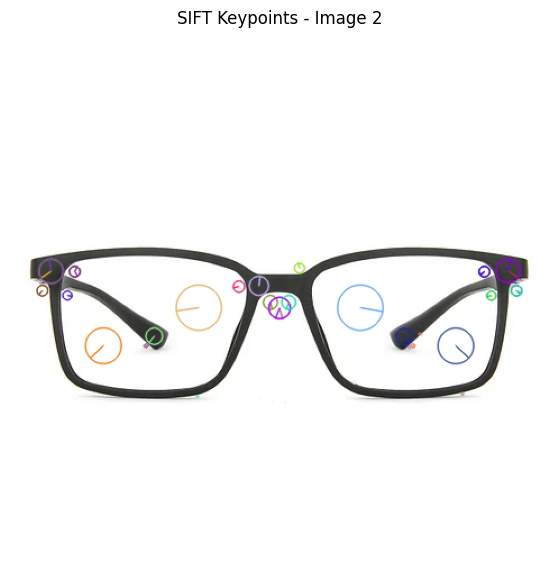

SIFT Good Matches: 5


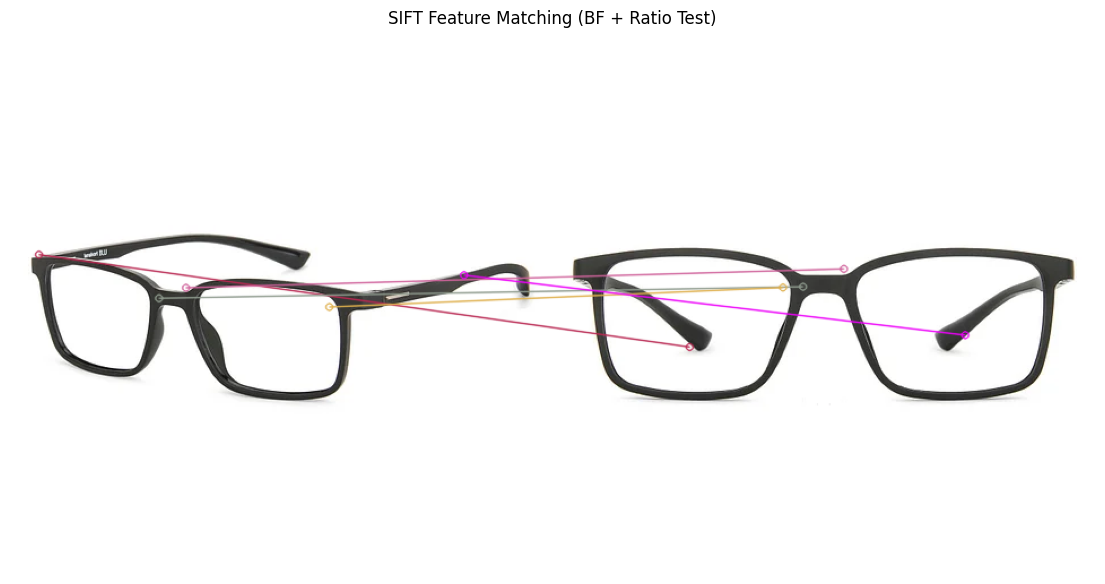


=== ORB FEATURE DETECTION ===
ORB Image1: 586 keypoints
ORB Image2: 458 keypoints


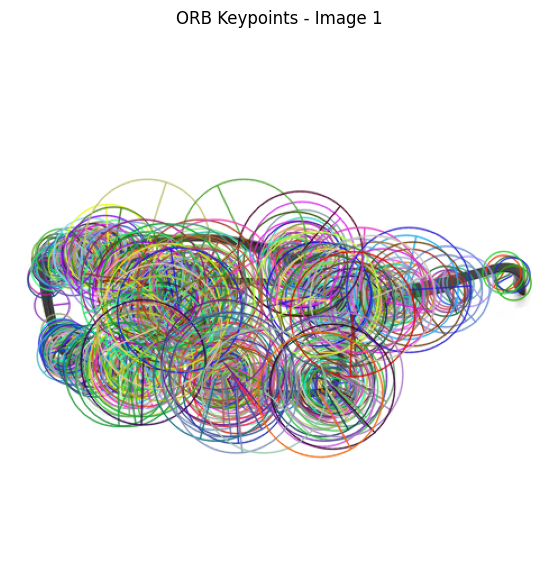

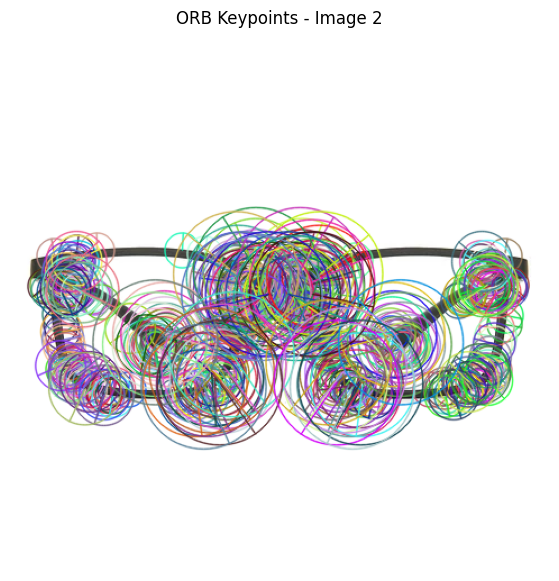

ORB Good Matches: 37


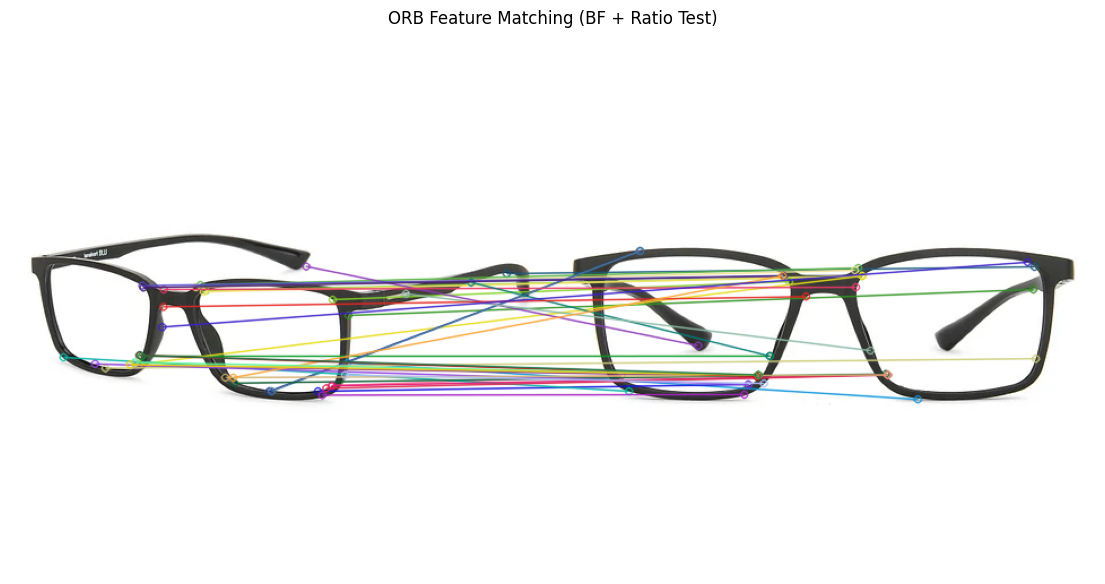

In [7]:
# ------------------------------------------------------------
# MAIN FUNCTION
# ------------------------------------------------------------
def main():
    # --------------------------------------------------------
    # UPDATE THESE IMAGE PATHS
    # --------------------------------------------------------
    image1_path = "lens.jpg"   # reference image
    image2_path = "lens1.jpg"   # transformed / second view

    try:
        img1_color, img1_gray = load_and_prepare_image(image1_path)
        img2_color, img2_gray = load_and_prepare_image(image2_path)
    except FileNotFoundError as e:
        print(e)
        return

    # --------------------------------------------------------
    # SIFT
    # --------------------------------------------------------
    print("\n=== SIFT FEATURE DETECTION ===")
    kp1_sift, des1_sift = detect_and_compute_sift(img1_gray)
    kp2_sift, des2_sift = detect_and_compute_sift(img2_gray)

    print(f"SIFT Image1: {len(kp1_sift)} keypoints")
    print(f"SIFT Image2: {len(kp2_sift)} keypoints")

    draw_keypoints(img1_color, kp1_sift, "SIFT Keypoints - Image 1")
    draw_keypoints(img2_color, kp2_sift, "SIFT Keypoints - Image 2")

    sift_matches = match_features(des1_sift, des2_sift, method="SIFT")
    print(f"SIFT Good Matches: {len(sift_matches)}")

    draw_matches(
        img1_color, kp1_sift,
        img2_color, kp2_sift,
        sift_matches,
        "SIFT Feature Matching (BF + Ratio Test)"
    )

    # --------------------------------------------------------
    # ORB
    # --------------------------------------------------------
    print("\n=== ORB FEATURE DETECTION ===")
    kp1_orb, des1_orb = detect_and_compute_orb(img1_gray)
    kp2_orb, des2_orb = detect_and_compute_orb(img2_gray)

    print(f"ORB Image1: {len(kp1_orb)} keypoints")
    print(f"ORB Image2: {len(kp2_orb)} keypoints")

    draw_keypoints(img1_color, kp1_orb, "ORB Keypoints - Image 1")
    draw_keypoints(img2_color, kp2_orb, "ORB Keypoints - Image 2")

    orb_matches = match_features(des1_orb, des2_orb, method="ORB")
    print(f"ORB Good Matches: {len(orb_matches)}")

    draw_matches(
        img1_color, kp1_orb,
        img2_color, kp2_orb,
        orb_matches,
        "ORB Feature Matching (BF + Ratio Test)"
    )


if __name__ == "__main__":
    main()
